# PIMC Densities inside Nanopores

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

import dgutils
from dgutils import colors as colortools
from numpy import pi as π
from wetting_utils import *
from collections import defaultdict
import matplotlib.transforms as mtransforms
from heprops import helium,potential
from pimcscripts import pimchelp


%config InlineBackend.figure_format = 'svg'
%matplotlib inline

## Load all the radial density data from disk

In [2]:
L = 25 # Å
element = ['Ar','Cs']
R = np.array([6.0,8.0])
μ = np.array([-5.0,-18.0,-40.0, -58.0])

ϱ = {}
est = {}
μval = {}
μmin_max = {}
N = {}

def lab(element,R):
    return f'{element} {R:.1f} Å'

for el in element:
    μmin = []
    μmax = []
    for cR in R:
        ϱ[lab(el,cR)] = pimchelp.PIMCResults(f'../data/pimc/{el}R{int(cR)}/radial-u-reduce.dat')
        est[lab(el,cR)] = pimchelp.PIMCResults(f'../data/pimc/{el}R{int(cR)}/estimator-u-reduce.dat')
        
        # we get a vector of μ values from the params
        μval[lab(el,cR)] = np.array([float(par.split("=", 1)[-1]) for par in ϱ[lab(el,cR)].params])
        μmin.append(μval[lab(el,cR)].min())
        μmax.append(μval[lab(el,cR)].max())

        # get the minimum and maximum # particles for each element and radius
        N[lab(el,cR)] = np.array([normalize_psi_PIMC(ϱ[lab(el,cR)].y(par),ϱ[lab(el,cR)].x(par)) for par in ϱ[lab(el,cR)].params])

    μmin_max[el] = (np.min(μmin),np.max(μmax))
        

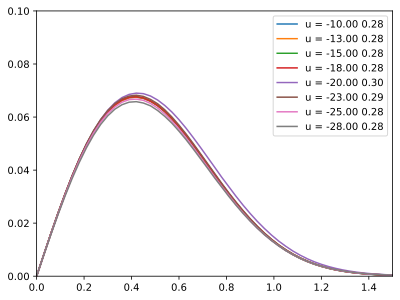

In [3]:
el,cR = 'Ar',6.0

for iμ in range(-25,-17):
    _r,_ρ = ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[iμ])
    Δr = _r[1] - _r[0]
    ρ1d = 2*π*np.sum(_r[:55]*_ρ[:55])*Δr

    plt.plot(_r, _r*_ρ, '-', label=ϱ[lab(el,cR)].params[iμ]+f' {ρ1d:.2f}')
    plt.xlim(0,1.5)
    plt.ylim(0,0.1)
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-12]), '-', label=ϱ[lab(el,cR)].params[-12])
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-11]), '-', label=ϱ[lab(el,cR)].params[-11])
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-10]), '-', label=ϱ[lab(el,cR)].params[-10])
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-9]), '-', label=ϱ[lab(el,cR)].params[-9])
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-8]), '-', label=ϱ[lab(el,cR)].params[-8])
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-7]), '-', label=ϱ[lab(el,cR)].params[-7])



plt.legend()

### We identify some interesting values of $\mu$ we want to highlight

In [4]:
num_particle = {lab('Ar',6.0): [2,11,30,36,53,61],lab('Ar',8.0): [3,13,43,87,104],
                lab('Cs',6.0): [2,3,6,8],lab('Cs',8.0): [2,4,10,20,30,42]}

hl_idx = defaultdict(list)
for el in element:
    for cR in R:
        Nint = np.array(np.rint(N[lab(el,cR)]), dtype=int)
        print(f'{lab(el,cR)}: N = {Nint}')
        for _n in num_particle[lab(el,cR)]:
            #print(_n, np.where(Nint == _n))
            hl_idx[lab(el,cR)].append(int(np.where(Nint == _n)[0][0]))

Ar 6.0 Å: N = [54 61 61 57 58 58 58 58 58 59 59 56 56 56 56 54 55 53 53 46 44 40 36 34
 33 30 11  2  0  0]
Ar 8.0 Å: N = [104 106 106 105 102 104 101 102  98  96  94  92  91  88  87  79  65  64
  62  59  56  53  51  43  13   3   0   0   0   0   0]
Cs 6.0 Å: N = [7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 7 7 7 7 7 7 7 7 6 6 6 6 6 6 6 6 6 6 6 5 5 4
 3 2 1 1]
Cs 8.0 Å: N = [40 40 40 40 40 41 41 41 41 42 42 42 42 43 39 39 39 39 39 38 38 37 37 37
 37 36 36 36 35 35 35 35 34 34 34 33 33 33 32 32 32 31 31 31 30 30 30 30
 29 29 29 28 28 28 28 27 27 27 26 26 26 26 25 25 25 24 24 24 23 23 23 22
 22 22 21 21 21 20 20 19 19 18 17 16 16 15 14 13 11 10  9  8  7  6  6  5
  5  4  4  3  3  3  3  2  2  2  2  2  2  2  1  1  1  1  1  1  1  1  1]


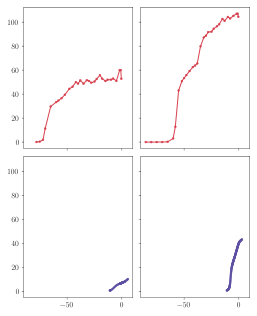

In [5]:
with plt.style.context('../include/aps.mplstyle'):
    figsize = plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(2,2,figsize=(figsize[0],2*figsize[1]), sharex=True, sharey=True, constrained_layout=True)

    for iel,el in enumerate(element):
        col = element_colors[el]
        for iR,cR in enumerate(R):
            x,y,Δy = est[lab(el,cR)].data['u'], est[lab(el,cR)].data['N'],est[lab(el,cR)].data['ΔN']
            ax[iel,iR].errorbar(x,y,Δy,marker='o', color=col, label=f'{el} {cR:.1f} Å', lw=None)

## Plot $\rho$ vs. $r$ for differrent $\mu$

Ar, R = 6.0:  N_min = 0.00, N_max = 61.24
Ar, R = 8.0:  N_min = 0.00, N_max = 106.43
Cs, R = 6.0:  N_min = 0.95, N_max = 8.01
Cs, R = 8.0:  N_min = 0.65, N_max = 42.72


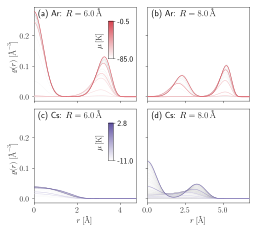

In [6]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.transforms as mtransforms

with plt.style.context('../include/aps.mplstyle'):
    figsize = plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(2,2,figsize=(figsize[0],0.9*figsize[0]), sharex=False, sharey=True, constrained_layout=True)
    trans = mtransforms.ScaledTranslation(1/72, -9/72, fig.dpi_scale_trans)
    plab = 'abcd'

    iax = 0
    for iel,el in enumerate(element):

        # Create custom colormaps for each element colorbar
        base_col = np.array(mcolors.to_rgb(element_colors[el]))
        cmap_el = mcolors.LinearSegmentedColormap.from_list("el_alpha", [(1,1,1), base_col])

        for iR,cR in enumerate(R):     

            if iel == 0:
                ax[0,iR].set_xticklabels([])

            # create panel labels
            ax[iel,iR].text(0.025, 1.0, f'({plab[iax]}) {el}: ' + f'$R = {cR:.1f}\,$'+r'${\rm \AA}$', transform=ax[iel,iR].transAxes + trans)

            # set x-axis limits
            ax[iel,iR].set_xlim(0,cR-1.25)

            # print out N_min,N_max for each element and radius
            print(f'{el}, R = {cR}:  N_min = {N[lab(el,cR)].min():.2f}, N_max = {N[lab(el,cR)].max():.2f}')
                   
            for iμ,μkey in enumerate(ϱ[lab(el,cR)].params):    

                μlab = r'$\mu = $' + f'{μval[lab(el,cR)][iμ]:.2f}' + r'$\, {\rm K}$'

                α = ((μval[lab(el,cR)][iμ]-μmin_max[el][0])/np.abs(μmin_max[el][0]-μmin_max[el][1]) + 0.01)/1.01
                norm_α = mcolors.Normalize(vmin=α.min(), vmax=α.max())
                zorder=int(100*α)
                _c = colortools.get_alpha_hex(element_colors[el], α)

                if iμ in hl_idx[lab(el,cR)]:
                    real_α = 1.0
                    lw=0.5
                else:
                    real_α = 0.2
                    _c = '#aaaaaa'
                    lw = 0.2
                    zorder = -10
                ax[iel,iR].plot(*ϱ[lab(el,cR)].pdata(μkey), label=μlab, color=_c, lw=lw, 
                                marker='None', zorder=zorder, alpha=real_α)

            ax[-1,iR].set_xlabel(r'$r\;[{\rm \AA}] $')
            if iR == 0:
                cax = ax[iel,iR].inset_axes([0.725, 0.45, 0.05, 0.4])
                cb = fig.colorbar(cm.ScalarMappable(norm=norm_α, cmap=cmap_el),cax=cax, orientation='vertical')
                cb.set_label(r'$\mu\, [{\rm K}]$', rotation=90, labelpad=5)
                cb.ax.yaxis.set_label_position('left')  
                cb.set_ticks([cb.mappable.norm.vmin,cb.mappable.norm.vmax])
                cb.set_ticklabels([f"{μmin_max[el][0]:.1f}", f"{μmin_max[el][1]:.1f}"])
    
            # increment axis counter
            iax += 1

        ax[iel,0].set_ylabel(r'$\varrho(r)\; [{\rm \AA}^{-3}]$')
    
    plt.savefig('../figures/rho_vs_r_mu_Teq2.pdf')